# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)

In [18]:
# sample code for Problem 2

obj = lambda x: (x - 1)**2  # note that this is 1D. In Prob 2 it should be 2D.
grad = lambda x: 2*(x - 1)  # this is not the correct gradient!
eps = 1e-3  # termination criterion
x0 = 0.  # initial guess
k = 0  # counter
soln = [x0]  # use an array to store the search steps
x = soln[k]  # start with the initial guess
error = abs(grad(x))  # compute the error. Note you will need to compute the norm for 2D grads, rather than the absolute value
# a = 0.01  # set a fixed step size to start with

# Armijo line search
def line_search(x):
    a = 1.  # initialize step size
    phi = lambda a, x: obj(x) - a*0.8*grad(x)**2  # define phi as a search criterion
    while phi(a,x)<obj(x-a*grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
        a = 0.5*a
    return a

while error >= eps:  # keep searching while gradient norm is larger than eps
    a = line_search(x)
    x = x - a*grad(x)
    soln.append(x)
    error = abs(grad(x))
    
soln  # print the search trajectory


[0.0,
 0.25,
 0.4375,
 0.578125,
 0.68359375,
 0.7626953125,
 0.822021484375,
 0.86651611328125,
 0.8998870849609375,
 0.9249153137207031,
 0.9436864852905273,
 0.9577648639678955,
 0.9683236479759216,
 0.9762427359819412,
 0.9821820519864559,
 0.9866365389898419,
 0.9899774042423815,
 0.9924830531817861,
 0.9943622898863396,
 0.9957717174147547,
 0.996828788061066,
 0.9976215910457995,
 0.9982161932843496,
 0.9986621449632622,
 0.9989966087224467,
 0.999247456541835,
 0.9994355924063762,
 0.9995766943047821]

Inital Point: [0. 0.]
corresponding Solution: [ 0.14244893 -0.78544215]


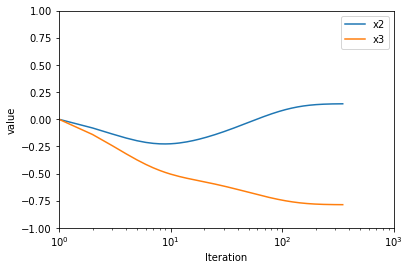

Inital Point: [1. 1.]
corresponding Solution: [ 0.1424432  -0.78543832]


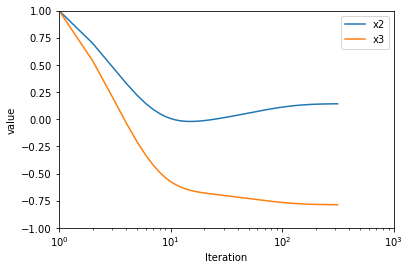

Inital Point: [-1. -1.]
corresponding Solution: [ 0.14244836 -0.78544176]


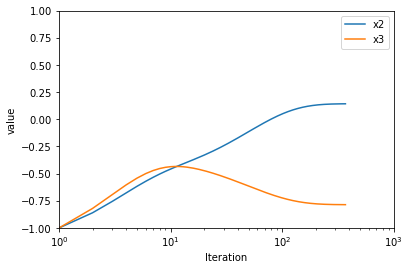

array([ 0.14244836, -0.78544176])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#define a function of the newton algorithm
def newton(param): 
    # input is the initial point
    print('====================================================================')
    objective = lambda l: 5.0*l[0]**2+8.0*l[0]+12.0*l[0]*l[1]+10.0*l[1]**2+14.0*l[1]+5.0 # objective function
    gradient = lambda m: np.array([10.0*m[0]+8.0+12.0*m[1],12.0*m[0]+20.0*m[1]+14.0]) # gradient
    eps = 1e-3    
    x = param # initial
    soln = np.array([param]) # array to store the solutions
    soln = np.append(soln,[x],axis=0)
    err = np.linalg.norm(gradient(x)) # calculate error
    a = 0.01 # searching speed
    # iteration until error < eps
    while err >= eps:
        x = x - a * gradient(x)
        soln = np.append(soln,[x],axis=0)
        err = np.linalg.norm(gradient(x))
    #print final solution
    print('Inital Point: ' + str(param))
    print('corresponding Solution: ' + str(x))
    # plot the log-linear curves
    plt.plot(soln[:,0], label='x2')
    plt.plot(soln[:,1], label='x3')
    plt.xscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('value')
    plt.axis([1, 1000,-1,1])
    plt.legend(loc='best')
    plt.show()
    return x
# test 1
test_number1 = np.array([0.0, 0.0])
newton(test_number1)
# test 2
test_number2 = np.array([1.0, 1.0])
newton(test_number2)
# test 3
test_number3 = np.array([-1.0, -1.0])
newton(test_number3)